In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql.expression import extract

In [5]:
#connect to data base
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# create a new instantiation
Base = automap_base()
# adding the tables from ("sqlite:///Resources/hawaii.sqlite")into this new instantiation to include the tables as an attribute
#attributes
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes (these are the tables i.e. the attributes and they keys are the name of the tables that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#Create our session (link) from Python to the DB - a session the interface/ connectivity with the db 
#that the data base can be queried 
session = Session(engine)

# Inspect Data Base 

In [10]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [11]:
Measurement_df = pd.read_sql("SELECT * FROM measurement",conn) 
Measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
Measurement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19550 non-null  int64  
 1   station  19550 non-null  object 
 2   date     19550 non-null  object 
 3   prcp     18103 non-null  float64
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [13]:
columns = inspector.get_columns('measurement')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"],column["type"],primarykeystr)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [14]:
Station_df = pd.read_sql("SELECT * FROM station",conn) 
Station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [15]:
Station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [16]:
columns = inspector.get_columns('station')
for column in columns:
    primarykeystr = ""
    if column['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(column["name"], column["type"], primarykeystr)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


# Exploratory Climate Analysis

Precipitation Analysis 

In [17]:
#number of dates recorded 
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [18]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [19]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [20]:
# Design a query to retrieve the last 12 months of precipitation data 
# Calculate the date 1 year ago from the last data point in the database
# Uses dates  2016-08-23 - 2017-08-23 for last 12 month time frames    
# Perform a query to retrieve the data and precipitation scores

# Load the results into a pandas dataframe. Set the index to the `emoji_id`


results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()
df=pd.DataFrame(results, columns = ["Date", "Precipitation"])
#df.set_index('date', inplace=True, )
df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


Text(0.5, 1.0, '2016 -2017 Rainfall')

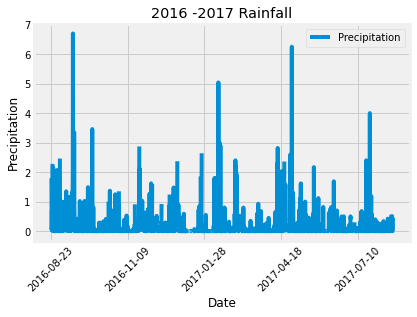

In [21]:
#Plot the results
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

df.sort_values("Date", inplace=True )
df.plot(x= "Date", y="Precipitation", rot = 45)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title ("2016 -2017 Rainfall" )                                    


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?

results = session.query(func.count(Station.station)).all()
results


[(9,)]

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

Station_activity = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
Station_activity                                 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
most_active_station=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active= most_active_station[0]
most_active

'USC00519281'

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_active_station_data = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active_station_data = session.query(*most_active_station_data).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
most_active_station_data

(54.0, 85.0, 71.66378066378067)

Text(0.5, 1.0, 'Temperature from 2016-08-23 to 2017-08-23\nmeasured at USC00519281')

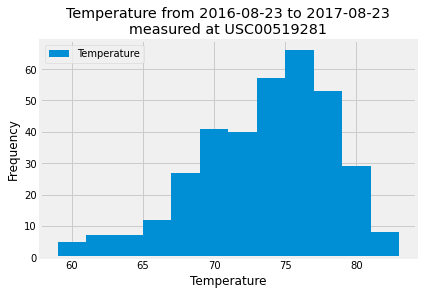

In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# suggest to use pandas plotting instead of Matplotlib but instructions did nit say to use pandas  - does not specifiucally r=instreuct to use pandas 
#changes to pandas plot
temp_data=session.query(Measurement.tobs).filter(Measurement.station== "USC00519281").\
filter(Measurement.date>= "2016-08-23").all()
temp_data

temp_data_df = pd.DataFrame(temp_data, columns=["Temperature"])

# plt.grid(axis='both', alpha=0.75)
temp_data_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f"Temperature from 2016-08-23 to 2017-08-23\nmeasured at USC00519281")


BONUS QUESTION


Temperature Analysis 1

## Bonus: Other Recommended Analyses

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

### Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

* You may either use SQLAlchemy or pandas's `read_csv()` to perform this portion.

* Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

* Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [28]:
# get all temperatures during June at all stations in all years

temperatures_june = session.query(Measurement.date, Measurement.tobs)\
    .filter(extract("month", Measurement.date) == "6").all()


In [29]:
# convert to dataframe
temperatures_june = pd.DataFrame(temperatures_june, columns = ["Date", "Temperature"])

temperatures_june

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [30]:
# get average June temperature
temp_june_avg = temperatures_june["Temperature"].mean()
temp_june_avg

74.94411764705882

In [31]:
# get the average temperature in December at all stations in all years

temperatures_dec = session.query(Measurement.date, Measurement.tobs)\
    .filter(extract("month", Measurement.date) == "12").all()


In [32]:
# convert to dataframe
temperatures_dec = pd.DataFrame(temperatures_dec, columns = ["Date", "Temperature"])
temperatures_dec


,Date,Temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [33]:
# get average December temperature
temp_dec_avg = temperatures_dec["Temperature"].mean()
temp_dec_avg

71.04152933421226

In [34]:
# create temp variables from each dataframe

june = temperatures_june ["Temperature"]

dec = temperatures_dec["Temperature"]


In [35]:
# use the t-test to determine whether the difference in the means, if any, is statistically significant

results = ttest_ind(june, dec)

results

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

t-test:
This was a pairerd t-test as we are looking to see if there is a statistically relevant difference between 2 variables for the same subject i.e. our two  variables (y)are date (june and december) and our subject is temperatures (x)

Above, a paired t-test was used to calculate the means of two different independent samples: temperature for June vs temperature for December across all available years in the dataset.

Results: t = 31.60, p = 3.9025129038616655e-191 - in in reality extremely small - 

Conclusion: The p-value is well below 0.05 level of significance therefore, while there there is only 3.9 degree difference, this difference is consistent across all years. This shows there is strong evidence to suggest there is a consistent difference in means between June and December temperatures across all years available.

Temperature Analysis II¶
Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01"). 
I have used 2017-07-05", "2017-07-15 as my trip was planned for 2018-07-05", "2018-07-15

In [36]:
def calc_temps(start_date, end_date):
    
     return session.query(func.min(Measurement.tobs), func.round(func.avg(Measurement.tobs)), func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()[0]

# display temp data for dates provided
my_trip_temps = calc_temps("2017-07-05", "2017-07-15")
my_trip_temps

(69.0, 78.0, 82.0)

In [37]:
# convert to dataframe for plotting

keys = ["Min", "Avg", "Max"]

dict_my_trip_temps = {keys[i]: my_trip_temps[i] for i in range(len(my_trip_temps))}

my_trip_temps_df = pd.DataFrame.from_dict(dict_my_trip_temps, orient="index", columns=["Temp"])

my_trip_temps_df

,Temp
Min,69.0
Avg,78.0
Max,82.0


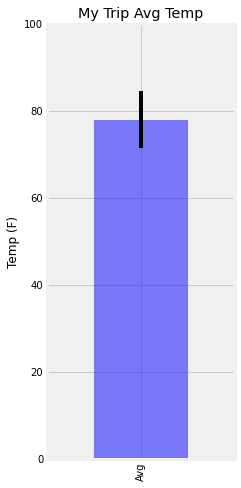

In [38]:
min_max = [69, 82]
temp_std = np.std(min_max)
error = temp_std

# plot bar char
my_trip_temps_df[1:2].plot(kind="bar", figsize=(3,8), ylim=(0,100), color="blue", alpha=0.5, legend=False, yerr=error)
plt.title("My Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.savefig("Images/avg_temp_bonus.png")
plt.show()

Daily Rainfall Average

* Calculate the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.



In [39]:
# calculate the rainfall per weather station using previous year's matching dates

prcp_2017 = session.query(Measurement.station, func.round(func.sum(Measurement.prcp), 2))\
    .filter(Measurement.date > '2017-07-05')\
    .filter(Measurement.date <= '2017-07-15')\
    .order_by(Measurement.date).group_by(Measurement.station).all()

prcp_2017

[('USC00513117', 0.56),
 ('USC00516128', 1.87),
 ('USC00517948', None),
 ('USC00519281', 1.18),
 ('USC00519397', 0.09),
 ('USC00519523', 0.11),
 ('USC00514830', 0.39)]

In [40]:
# define daily normals function

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    daily_normals = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*daily_normals).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("07-05")


[(66.0, 75.0, 81.0)]

In [41]:
# eds

In [42]:
## create a list of dates for the trip

my_trip_dates = ["07-05", "07-06", "07-07", "07-08", "07-09", "07-10", "07-11", "07-12", "07-13", "07-14", "07-15"]

# use daily normals function to calculate temp for each date in trip_dates and append to list

my_trip_results = []

for i, date in enumerate(my_trip_dates):
    
    my_trip_temps = daily_normals(date)
    
    my_trip_results.append(my_trip_temps)
    
print(my_trip_results)

[[(66.0, 75.0, 81.0)], [(69.0, 75.0, 81.0)], [(69.0, 74.91071428571429, 82.0)], [(69.0, 76.08333333333333, 83.0)], [(68.0, 76.19298245614036, 83.0)], [(68.0, 75.62068965517241, 82.0)], [(70.0, 75.78947368421052, 81.0)], [(67.0, 75.96491228070175, 82.0)], [(69.0, 76.1896551724138, 81.0)], [(61.0, 76.2280701754386, 82.0)], [(68.0, 76.2542372881356, 82.0)]]


In [43]:
# create dict of dates and tobs for trip dates

my_trip_temps_dict = {my_trip_dates[i]: my_trip_results[i] for i in range(len(my_trip_results))}

my_trip_temps_dict


{'07-05': [(66.0, 75.0, 81.0)],
 '07-06': [(69.0, 75.0, 81.0)],
 '07-07': [(69.0, 74.91071428571429, 82.0)],
 '07-08': [(69.0, 76.08333333333333, 83.0)],
 '07-09': [(68.0, 76.19298245614036, 83.0)],
 '07-10': [(68.0, 75.62068965517241, 82.0)],
 '07-11': [(70.0, 75.78947368421052, 81.0)],
 '07-12': [(67.0, 75.96491228070175, 82.0)],
 '07-13': [(69.0, 76.1896551724138, 81.0)],
 '07-14': [(61.0, 76.2280701754386, 82.0)],
 '07-15': [(68.0, 76.2542372881356, 82.0)]}

In [44]:
# convert dict to dataframe

my_trip_df = pd.DataFrame.from_dict(my_trip_temps_dict, orient="index", columns=["Min", "Avg", "Max"])

my_trip_df

ValueError: 3 columns passed, passed data had 1 columns

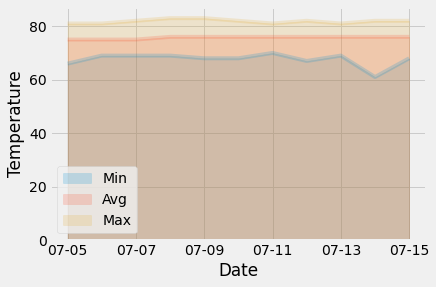

In [ ]:
# create an area plot

my_trip_df.plot.area(stacked=False, alpha=0.2)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.show()